<a href="https://colab.research.google.com/github/felipemartenexen/CMV_AdvancedSearch_Widget/blob/master/artigo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install pymannkendall

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm
import urllib.request
import os
import pymannkendall as mk

In [16]:
# --- Nova URL para a fonte ---
font_url = 'https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf'
font_path = 'TimesNewRoman.ttf'

# Baixar a fonte
try:
    # Verifica se o arquivo já existe para não baixar de novo
    if not os.path.exists(font_path):
        urllib.request.urlretrieve(font_url, font_path)
        print(f"Fonte '{font_path}' baixada com sucesso.")
    else:
        print(f"Fonte '{font_path}' já existe.")

    # Adicionar a fonte ao gerenciador de fontes do matplotlib
    fm.fontManager.addfont(font_path)
    print(f"Fonte '{font_path}' adicionada ao matplotlib.")

    # Definir a fonte como padrão (para 'serif')
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Times New Roman'
    plt.rcParams['axes.titleweight'] = 'bold'

    print("\nConfiguração concluída. A fonte 'Times New Roman' está pronta para uso.")

except Exception as e:
    print(f"Ocorreu um erro ao baixar ou configurar a fonte: {e}")
    print("Verifique a URL da fonte ou sua conexão com a internet.")

Fonte 'TimesNewRoman.ttf' já existe.
Fonte 'TimesNewRoman.ttf' adicionada ao matplotlib.

Configuração concluída. A fonte 'Times New Roman' está pronta para uso.


In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/felipemartenexen/ppgeo/refs/heads/main/dados/regiao-xingu-anual-burned.csv")

df = df.drop(columns=['.geo', 'system:index'])

municipality_code_to_name = {
    1500602: 'Altamira',
    1505650: 'Placas',
    1508159: 'Uruará',
    1504455: 'Medicilândia',
    1501725: 'Brasil Novo',
    1505908: 'Porto de Moz',
    1508357: 'Vitória do Xingu',
    1507805: 'Senador José Porfírio',
    1500859: 'Anapu',
    1505486: 'Pacajá'
}

id_to_class = {
    3: 'Formação Florestal',
    4: 'Formação Savânica',
    9: 'Silvicultura',
    11: 'Campo Alagado e Área Pantanosa',
    12: 'Formação Campestre',
    15: 'Pastagem',
    24: 'Área Urbanizada',
    29: 'Afloramento Rochoso',
    30: 'Mineração',
    33: "Corpo D'água",
    39: 'Soja',
    41: 'Outras Lavouras Temporárias',
    48: 'Outras Lavouras Perenes'
}

id_to_lev1 = {
    'Formação Florestal': 'Natural',
    'Formação Savânica': 'Natural',
    'Silvicultura': 'Antrópico',
    'Campo Alagado e Área Pantanosa': 'Natural',
    'Formação Campestre': 'Natural',
    'Pastagem': 'Antrópico',
    'Soja': 'Antrópico',
    'Outras Lavouras Temporárias': 'Antrópico',
    'Outras Lavouras Perene': 'Antrópico'
}

df['NM_MUN'] = df['territory'].map(municipality_code_to_name)

df['class_name'] = df['Classe'].map(id_to_class)

df['class_lev1'] = df['class_name'].map(id_to_lev1)

print(df.head())

   Classe      Nome                   class_name_n1  \
0       3  Altamira                        Floresta   
1       4  Altamira                        Floresta   
2       6  Altamira                        Floresta   
3      11  Altamira  Vegetação Herbácea e Arbustiva   
4      12  Altamira  Vegetação Herbácea e Arbustiva   

                    class_name_n4  territory  year    Área ha    NM_MUN  \
0              Formação Florestal  1500602.0  1985   6.826306  Altamira   
1               Formação Savânica  1500602.0  1985  22.938318  Altamira   
2               Floresta Alagável  1500602.0  1985   0.844563  Altamira   
3  Campo Alagado e Área Pantanosa  1500602.0  1985   1.124110  Altamira   
4              Formação Campestre  1500602.0  1985   3.377031  Altamira   

                       class_name class_lev1  
0              Formação Florestal    Natural  
1               Formação Savânica    Natural  
2                             NaN        NaN  
3  Campo Alagado e Área Pantan

--- Resultados da Análise de Tendência Não-Paramétrica ---

[Teste de Mann-Kendall (Significância)]
Tendência: increasing
p-valor: 0.000000
Estatística Z: 5.9304

[Estimador de Sen (Magnitude)]
Slope (Inclinação mediana): 100.2031
Intercepto: -347.2122

---------------- Interpretação para o Artigo ----------------
Foi detectada uma tendência de 'increasing' estatisticamente significativa (p < 0.000).
A magnitude dessa tendência, estimada pelo método de Sen, é de um aumento mediano de 100.20 ha por ano.
-------------------------------------------------------------


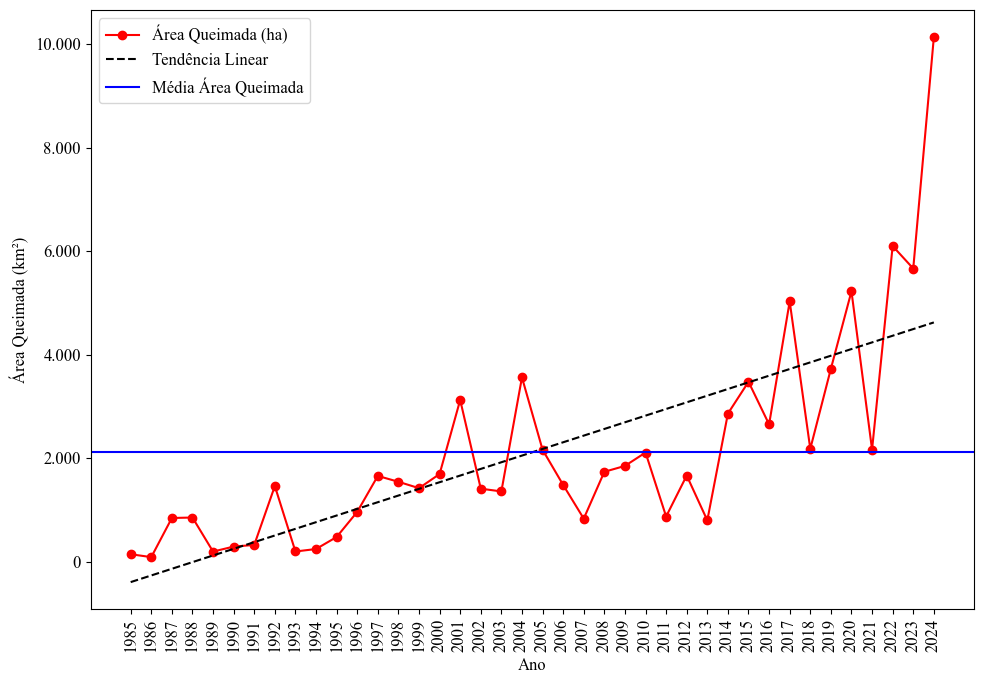

In [18]:
#%% Distribuição Anual
df_fire_year = df.groupby('year')['Área ha'].sum().reset_index()

# --- Teste de Mann-Kendall (você já tem isso) ---
mk_result = mk.original_test(df_fire_year['Área ha'])

# --- Cálculo do Estimador de Sen ---
sen_result = mk.sens_slope(df_fire_year['Área ha'])


# --- Exibição dos resultados combinados ---
print("--- Resultados da Análise de Tendência Não-Paramétrica ---")

print("\n[Teste de Mann-Kendall (Significância)]")
print(f"Tendência: {mk_result.trend}")
print(f"p-valor: {mk_result.p:.6f}")
print(f"Estatística Z: {mk_result.z:.4f}")

print("\n[Estimador de Sen (Magnitude)]")
print(f"Slope (Inclinação mediana): {sen_result.slope:.4f}")
print(f"Intercepto: {sen_result.intercept:.4f}")

print("\n---------------- Interpretação para o Artigo ----------------")
if mk_result.p < 0.05:
    print(f"Foi detectada uma tendência de '{mk_result.trend}' estatisticamente significativa (p < {mk_result.p:.3f}).")
    print(f"A magnitude dessa tendência, estimada pelo método de Sen, é de um aumento mediano de {sen_result.slope:.2f} ha por ano.")
else:
    print(f"Nenhuma tendência estatisticamente significativa foi detectada (p = {mk_result.p:.3f}).")
print("-------------------------------------------------------------")

# Cálculo da média
media_area_queimada = df_fire_year["Área ha"].mean()

# Cálculo da tendência linear
slope, intercept, r_value, p_value, std_err = stats.linregress(df_fire_year.index, df_fire_year["Área ha"])

# Adicionando a tendência linear ao DataFrame
df_fire_year['trend'] = intercept + slope * df_fire_year.index

# Configurando a fonte globalmente
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Plotando os dados, a tendência e a linha da média
ax = plt.figure(figsize=(10, 7))
plt.plot(df_fire_year["year"], df_fire_year["Área ha"], label='Área Queimada (ha)', marker='o', color='red')
plt.plot(df_fire_year["year"], df_fire_year["trend"], label='Tendência Linear', linestyle='--', color='black')
plt.axhline(y=media_area_queimada, color='blue', linestyle='-', label='Média Área Queimada')

# Função para formatar os valores do eixo Y com separador de milhar como ponto
def custom_formatter(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

plt.xlabel('Ano')
plt.ylabel('Área Queimada (km²)')
plt.legend()
plt.xticks(df_fire_year["year"], rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

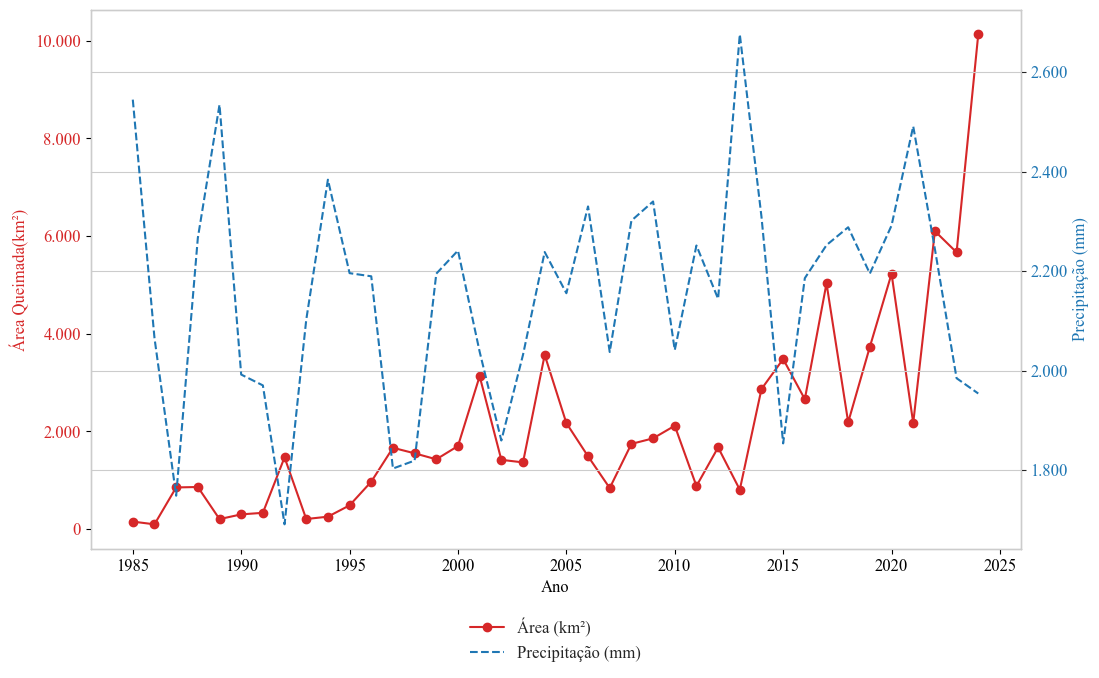

In [19]:
# %% Gráfico Precipitação Área Queimada

precipitation_df = pd.read_csv('https://raw.githubusercontent.com/felipemartenexen/ppgeo/refs/heads/main/dados/regiao-xingu-rainfall-by-year.csv')

# Agrupar os dados somente por 'year', somando as áreas, para corresponder aos dados de precipitação
total_area_by_year_df = df.groupby('year')['Área ha'].sum().reset_index()

# Unir os conjuntos de dados com base em 'year'
merged_df = pd.merge(total_area_by_year_df, precipitation_df[['year', 'precipitation']], on='year', how='inner')

# Selecionar as colunas de interesse: 'year', 'precipitation', e 'area'
final_df = merged_df[['year', 'precipitation', 'Área ha']]

# Exibir as primeiras linhas do dataframe final
final_df.head()

# Configurar o gráfico com estilos mais avançados
fig, ax1 = plt.subplots(figsize=(12, 7))

# Melhorar a aparência com seaborn
sns.set_style("whitegrid")

# Definição da fonte (você precisará definir 'font_path' caso o try acima falhe)
plt.rcParams['font.family'] = 'Times New Roman'

# Função para formatar os valores do eixo Y com separador de milhar como ponto
def custom_formatter(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

# Eixo para 'area'
color = 'tab:red'
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Área Queimada(km²)', color=color, fontsize=12)
lns1 = ax1.plot(final_df['year'], final_df['Área ha'], color=color, label='Área (km²)', marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Eixo para 'precipitation'
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precipitação (mm)', color=color, fontsize=12)
lns2 = ax2.plot(final_df['year'], final_df['precipitation'], color=color, label='Precipitação (mm)', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

# Combinar legendas
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper center',bbox_to_anchor=(0.5, -0.1), fontsize=12, frameon=False)

# Formatando o eixo y para usar ponto como separador de milhar
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Mostrar o gráfico
plt.show()


Dados prontos para o gráfico:
   year  precipitation     Área ha
0  1985    2544.429003  151.661598
1  1986    2065.437725   96.077552
2  1987    1748.458631  851.286468
3  1988    2266.505838  860.336016
4  1989    2534.320379  202.982523


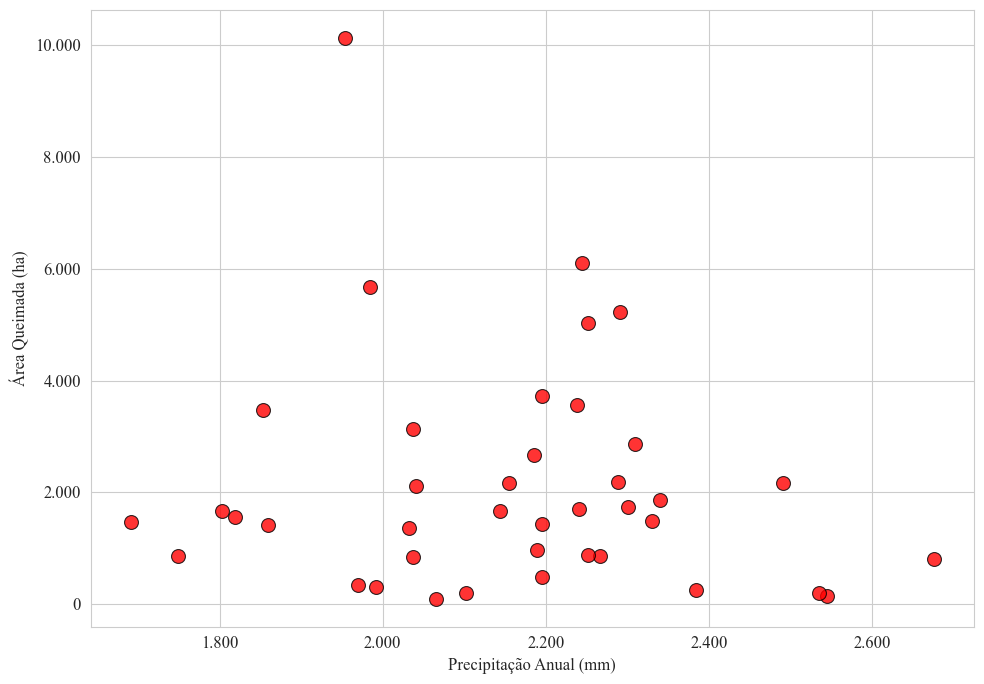

In [20]:
# --- 1. Carregar e Preparar os Dados ---
# (O seu código para carregar e preparar os dados permanece o mesmo)

# Carrega dados de precipitação
precipitation_df = pd.read_csv('https://raw.githubusercontent.com/felipemartenexen/ppgeo/refs/heads/main/dados/regiao-xingu-rainfall-by-year.csv')

# !!! ATENÇÃO: Garanta que 'df' esteja definido e carregado.
# Ex: df = pd.read_csv('caminho/para/dados_de_area_queimada.csv')
total_area_by_year_df = df.groupby('year')['Área ha'].sum().reset_index()

# Unir os conjuntos de dados com base em 'year'
merged_df = pd.merge(total_area_by_year_df, precipitation_df[['year', 'precipitation']], on='year', how='inner')

# Selecionar as colunas de interesse
final_df = merged_df[['year', 'precipitation', 'Área ha']]

print("Dados prontos para o gráfico:")
print(final_df.head())


# --- 2. Configuração de Estilo ---

# Função para formatar os valores dos eixos com separador de milhar como ponto
def custom_formatter(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

# Estilo do Seaborn e fonte
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'


# --- 3. Criação do Gráfico de Dispersão ---

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 7))

# Criar o gráfico de dispersão (scatter plot)
# Eixo X = precipitação
# Eixo Y = Área ha
sns.scatterplot(
    data=final_df,
    x='precipitation',
    y='Área ha',
    ax=ax,
    color='red',      # Define uma cor única para todos os pontos
    s=100,             # Tamanho dos pontos
    alpha=0.8,         # Transparência dos pontos
    edgecolor='k',     # Borda preta nos pontos
    legend=False       # Remove explicitamente qualquer legenda
)

# --- 4. Rótulos e Formatação ---

# Definir rótulos dos eixos
ax.set_xlabel('Precipitação Anual (mm)', fontsize=12)
ax.set_ylabel('Área Queimada (ha)', fontsize=12)

# Tamanho das fontes dos eixos
ax.tick_params(axis='both', labelsize=12)

# Formatando os eixos X e Y para usar ponto como separador de milhar
ax.yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Ajustar layout para não cortar os rótulos
plt.tight_layout()

# Mostrar o gráfico
plt.show()

=== ANÁLISE DE CORRELAÇÃO: PRECIPITAÇÃO vs ÁREA QUEIMADA ===

1. ESTATÍSTICAS DESCRITIVAS
Período analisado: 1985 - 2024
Total de anos: 40
Anos com El Niño: 23
Anos sem El Niño: 17

Estatísticas das variáveis:
       precipitation   area_ha
count          40.00     40.00
mean         2155.80   2120.05
std           222.49   2025.69
min          1690.99     96.08
25%          2021.78    848.23
50%          2192.04   1606.75
75%          2288.86   2710.33
max          2675.69  10130.75

2. ANÁLISE DE CORRELAÇÃO
Correlação de Pearson: -0.117
Correlação de Spearman: -0.048
Valor-p: 0.4732
Interpretação: Correlação fraca e negativa

3. ANÁLISE POR CONDIÇÃO EL NIÑO
        precipitation                            area_ha                   \
                 mean     std      min      max     mean      std     min   
el_nino                                                                     
False         2279.58  185.09  1991.97  2675.69  1915.98  1870.63  151.66   
True          2064.31  2

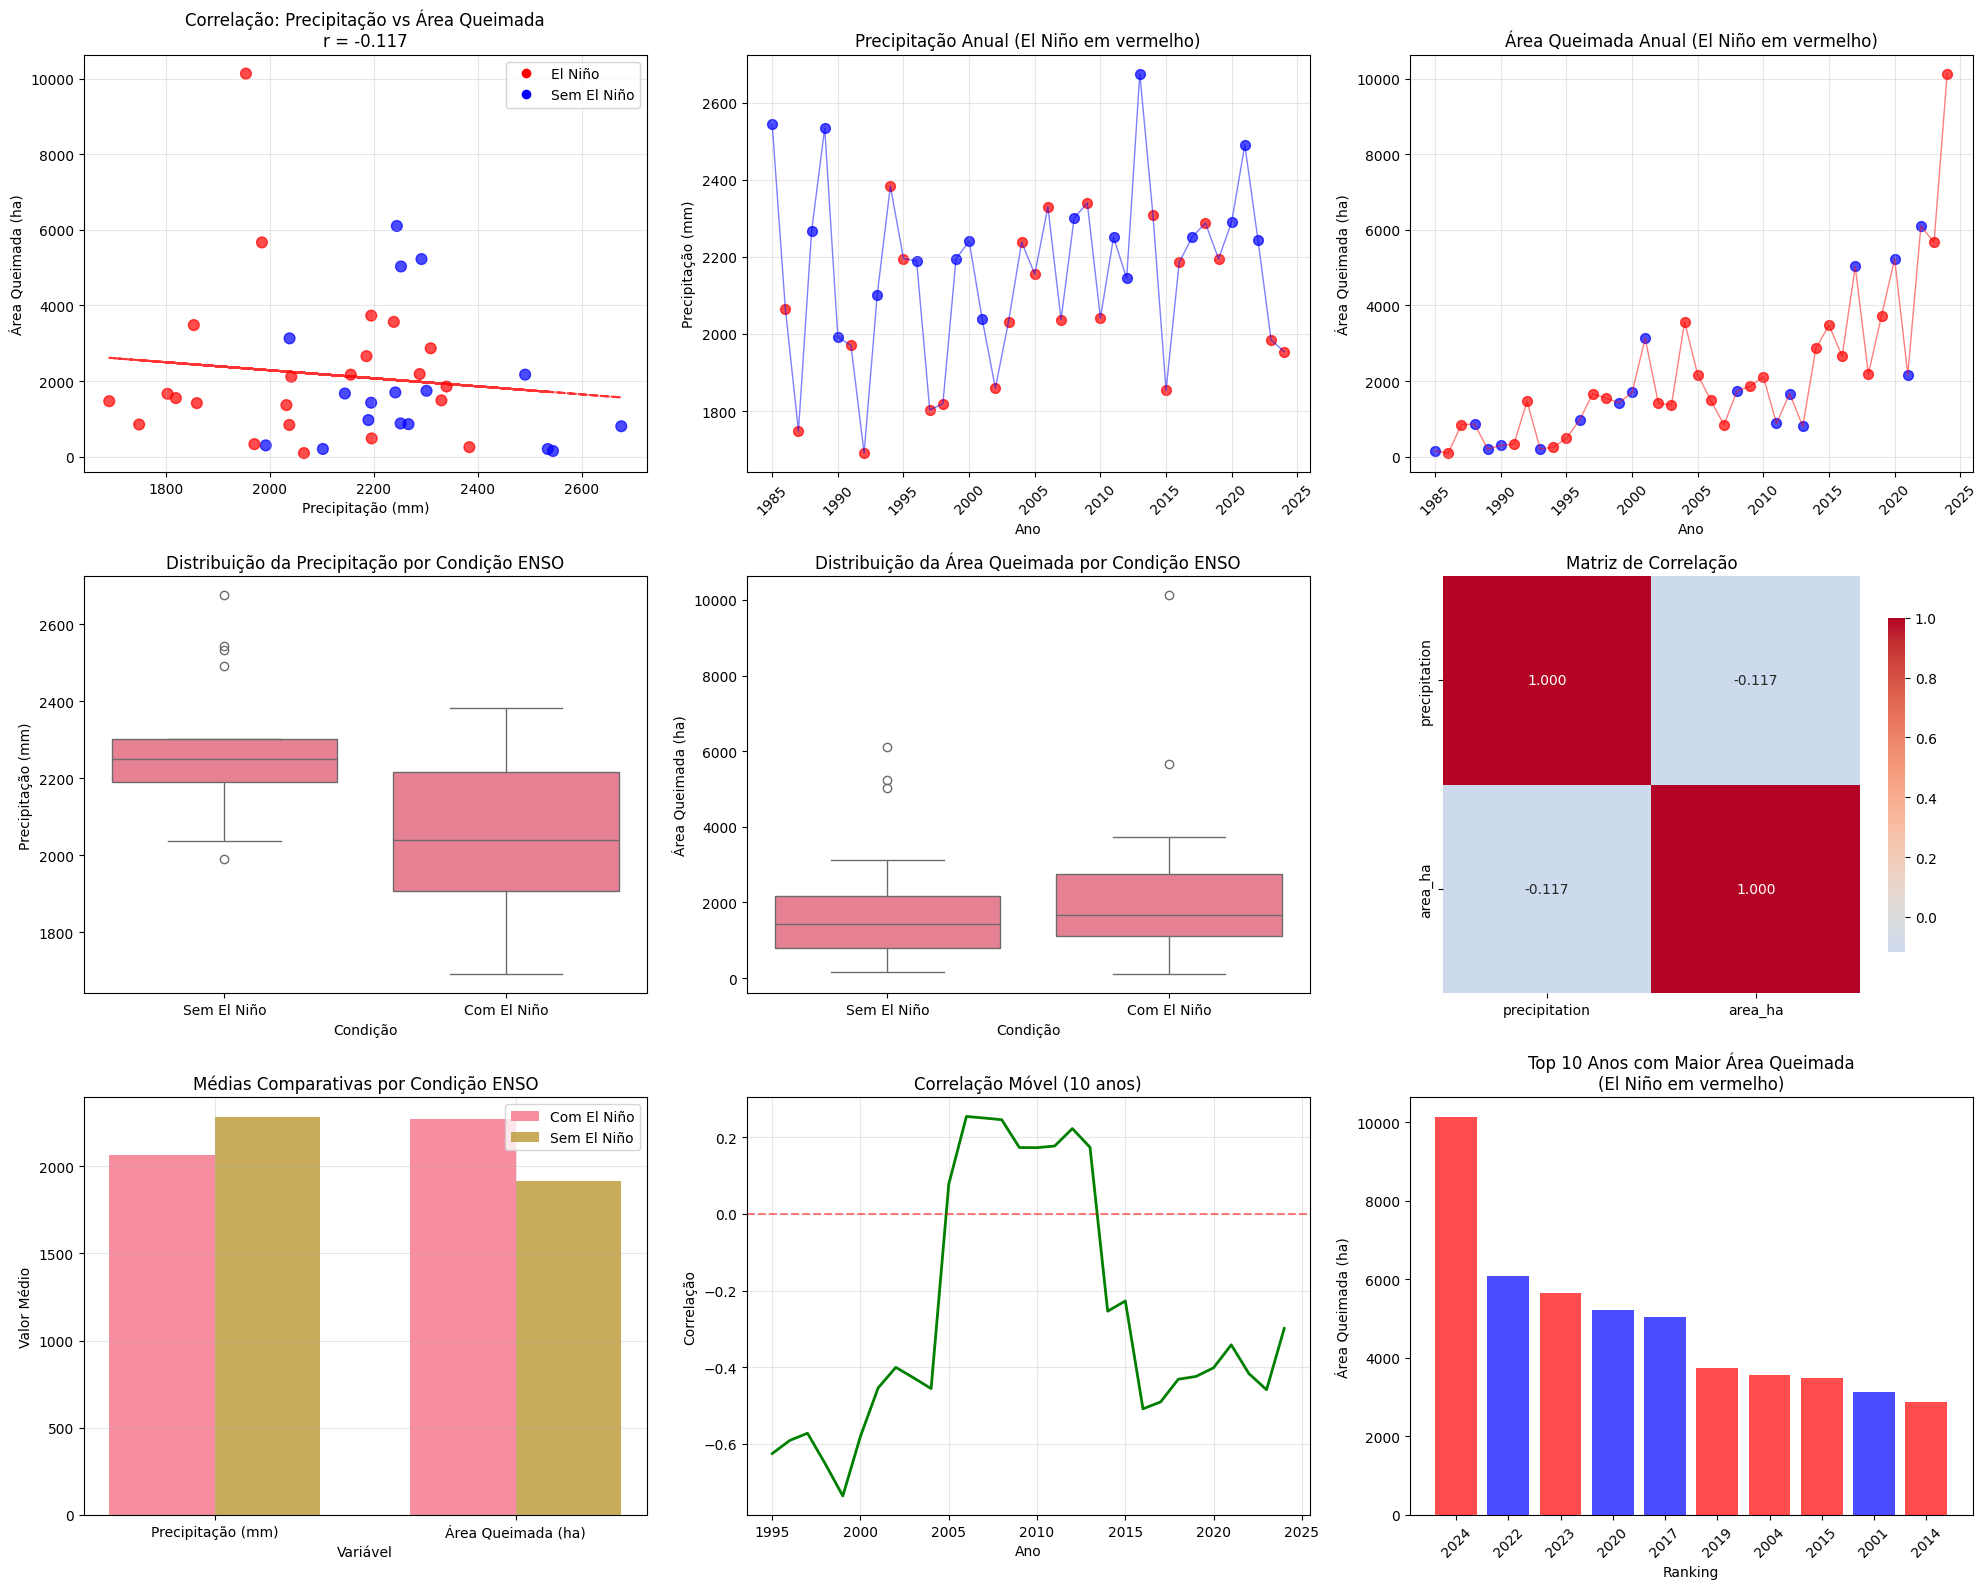


5. ANÁLISE DETALHADA DOS ANOS DE EL NIÑO

Anos de El Niño no período:
 year  precipitation  area_ha el_nino_intensity
 1986        2065.44    96.08          Moderado
 1987        1748.46   851.29          Moderado
 1991        1970.17   331.47             Forte
 1992        1690.99  1467.58             Forte
 1994        2383.60   252.45          Moderado
 1995        2195.72   484.41          Moderado
 1997        1803.09  1663.34       Muito Forte
 1998        1819.08  1550.16       Muito Forte
 2002        1859.42  1416.93          Moderado
 2003        2031.72  1364.21          Moderado
 2004        2238.21  3564.75             Fraco
 2005        2155.41  2168.90             Fraco
 2006        2329.83  1489.21             Fraco
 2007        2037.29   839.07             Fraco
 2009        2339.76  1856.58          Moderado
 2010        2041.11  2114.67          Moderado
 2014        2309.18  2866.46            Neutro
 2015        1853.60  3480.77       Muito Forte
 2016        2185

In [21]:
# -*- coding: utf-8 -*-
"""
Análise de Correlação entre Precipitação e Área Queimada (1985-2024)
Incluindo identificação de anos de El Niño
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from io import StringIO

# Configurações de estilo
plt.style.use('default')
sns.set_palette("husl")
print("=== ANÁLISE DE CORRELAÇÃO: PRECIPITAÇÃO vs ÁREA QUEIMADA ===\n")

# Dados convertidos para formato internacional
data = """year,precipitation,area_ha
1985,2544.429003,151.6615981
1986,2065.437725,96.07755153
1987,1748.458631,851.2864681
1988,2266.505838,860.3360161
1989,2534.320379,202.9825227
1990,1991.96678,299.6133667
1991,1970.173147,331.4681426
1992,1690.992936,1467.578781
1993,2101.804669,204.6161042
1994,2383.597632,252.4515665
1995,2195.723084,484.4141482
1996,2189.405286,969.4451753
1997,1803.093072,1663.335116
1998,1819.075967,1550.162976
1999,2194.67831,1427.242566
2000,2241.171156,1699.355191
2001,2037.727132,3129.475442
2002,1859.419927,1416.930709
2003,2031.717184,1364.207455
2004,2238.211341,3564.749959
2005,2155.411426,2168.904323
2006,2329.826404,1489.214193
2007,2037.293061,839.0722792
2008,2301.193257,1743.027667
2009,2339.756939,1856.581323
2010,2041.114512,2114.671326
2011,2251.295798,879.7374991
2012,2144.140116,1670.786906
2013,2675.691237,805.4057648
2014,2309.176493,2866.461979
2015,1853.60352,3480.767954
2016,2185.659793,2658.281358
2017,2252.06685,5030.572772
2018,2287.979544,2185.741112
2019,2194.899053,3731.125768
2020,2291.500943,5226.361997
2021,2490.820666,2170.565976
2022,2244.091504,6100.416143
2023,1984.625409,5666.29869
2024,1953.872461,10130.74997"""

# Criar DataFrame
df = pd.read_csv(StringIO(data))

# Definir anos de El Niño (baseado em registros históricos NOAA)
el_nino_years = [
    1986, 1987,  # 1986-1987
    1991, 1992,  # 1991-1992
    1994, 1995,  # 1994-1995
    1997, 1998,  # 1997-1998 (forte)
    2002, 2003,  # 2002-2003
    2004, 2005,  # 2004-2005
    2006, 2007,  # 2006-2007
    2009, 2010,  # 2009-2010
    2014, 2015, 2016,  # 2014-2016 (forte)
    2018, 2019,  # 2018-2019
    2023, 2024   # 2023-2024 (forte)
]

# Adicionar coluna El Niño
df['el_nino'] = df['year'].isin(el_nino_years)
df['el_nino_intensity'] = df['year'].apply(lambda x:
    'Muito Forte' if x in [1997, 1998, 2015, 2016, 2023, 2024] else
    'Forte' if x in [1991, 1992] else
    'Moderado' if x in [1986, 1987, 1994, 1995, 2002, 2003, 2009, 2010] else
    'Fraco' if x in [2004, 2005, 2006, 2007, 2018, 2019] else
    'Neutro'
)

# =============================================================================
# 1. ANÁLISE DESCRITIVA
# =============================================================================
print("1. ESTATÍSTICAS DESCRITIVAS")
print("=" * 50)
print(f"Período analisado: {df['year'].min()} - {df['year'].max()}")
print(f"Total de anos: {len(df)}")
print(f"Anos com El Niño: {df['el_nino'].sum()}")
print(f"Anos sem El Niño: {len(df) - df['el_nino'].sum()}")

print("\nEstatísticas das variáveis:")
print(df[['precipitation', 'area_ha']].describe().round(2))

# =============================================================================
# 2. CORRELAÇÃO GERAL
# =============================================================================
print("\n2. ANÁLISE DE CORRELAÇÃO")
print("=" * 50)

# Correlação de Pearson
corr_pearson = df['precipitation'].corr(df['area_ha'])
corr_spearman = df['precipitation'].corr(df['area_ha'], method='spearman')

print(f"Correlação de Pearson: {corr_pearson:.3f}")
print(f"Correlação de Spearman: {corr_spearman:.3f}")

# Teste de significância
corr_test = stats.pearsonr(df['precipitation'], df['area_ha'])
print(f"Valor-p: {corr_test.pvalue:.4f}")

# Interpretação da correlação
if abs(corr_pearson) < 0.3:
    strength = "fraca"
elif abs(corr_pearson) < 0.7:
    strength = "moderada"
else:
    strength = "forte"

direction = "negativa" if corr_pearson < 0 else "positiva"
print(f"Interpretação: Correlação {strength} e {direction}")

# =============================================================================
# 3. ANÁLISE POR CONDIÇÃO EL NIÑO
# =============================================================================
print("\n3. ANÁLISE POR CONDIÇÃO EL NIÑO")
print("=" * 50)

# Estatísticas comparativas
el_nino_stats = df.groupby('el_nino').agg({
    'precipitation': ['mean', 'std', 'min', 'max'],
    'area_ha': ['mean', 'std', 'min', 'max'],
    'year': 'count'
}).round(2)

print(el_nino_stats)

# Correlações separadas
corr_el_nino = df[df['el_nino']]['precipitation'].corr(df[df['el_nino']]['area_ha'])
corr_non_el_nino = df[~df['el_nino']]['precipitation'].corr(df[~df['el_nino']]['area_ha'])

print(f"\nCorrelação Precipitação x Área Queimada:")
print(f"  Anos com El Niño: {corr_el_nino:.3f} (n={df['el_nino'].sum()})")
print(f"  Anos sem El Niño: {corr_non_el_nino:.3f} (n={len(df) - df['el_nino'].sum()})")

# =============================================================================
# 4. VISUALIZAÇÕES
# =============================================================================
print("\n4. GERANDO VISUALIZAÇÕES...")

# Configurar figura principal
fig = plt.figure(figsize=(20, 16))

# 4.1 Gráfico de dispersão com correlação
plt.subplot(3, 3, 1)
colors = ['red' if el_nino else 'blue' for el_nino in df['el_nino']]
scatter = plt.scatter(df['precipitation'], df['area_ha'], c=colors, alpha=0.7, s=60)

# Adicionar linha de tendência
z = np.polyfit(df['precipitation'], df['area_ha'], 1)
p = np.poly1d(z)
plt.plot(df['precipitation'], p(df['precipitation']), "r--", alpha=0.8,
         label=f'Tendência (r = {corr_pearson:.2f})')

plt.xlabel('Precipitação (mm)')
plt.ylabel('Área Queimada (ha)')
plt.title(f'Correlação: Precipitação vs Área Queimada\nr = {corr_pearson:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Adicionar legenda para El Niño
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='El Niño'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Sem El Niño')
]
plt.legend(handles=legend_elements)

# 4.2 Série temporal - Precipitação
plt.subplot(3, 3, 2)
for i, row in df.iterrows():
    color = 'red' if row['el_nino'] else 'blue'
    plt.scatter(row['year'], row['precipitation'], color=color, s=50, alpha=0.7)

plt.plot(df['year'], df['precipitation'], 'b-', alpha=0.5, linewidth=1)
plt.xlabel('Ano')
plt.ylabel('Precipitação (mm)')
plt.title('Precipitação Anual (El Niño em vermelho)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 4.3 Série temporal - Área Queimada
plt.subplot(3, 3, 3)
for i, row in df.iterrows():
    color = 'red' if row['el_nino'] else 'blue'
    plt.scatter(row['year'], row['area_ha'], color=color, s=50, alpha=0.7)

plt.plot(df['year'], df['area_ha'], 'r-', alpha=0.5, linewidth=1)
plt.xlabel('Ano')
plt.ylabel('Área Queimada (ha)')
plt.title('Área Queimada Anual (El Niño em vermelho)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 4.4 Boxplot comparativo - Precipitação
plt.subplot(3, 3, 4)
df_box = df.copy()
df_box['Condição'] = df_box['el_nino'].map({True: 'Com El Niño', False: 'Sem El Niño'})
sns.boxplot(data=df_box, x='Condição', y='precipitation')
plt.title('Distribuição da Precipitação por Condição ENSO')
plt.ylabel('Precipitação (mm)')

# 4.5 Boxplot comparativo - Área Queimada
plt.subplot(3, 3, 5)
sns.boxplot(data=df_box, x='Condição', y='area_ha')
plt.title('Distribuição da Área Queimada por Condição ENSO')
plt.ylabel('Área Queimada (ha)')

# 4.6 Heatmap de correlação
plt.subplot(3, 3, 6)
corr_matrix = df[['precipitation', 'area_ha']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação')

# 4.7 Gráfico de barras - Médias comparativas
plt.subplot(3, 3, 7)
means_el_nino = df[df['el_nino']][['precipitation', 'area_ha']].mean()
means_non_el_nino = df[~df['el_nino']][['precipitation', 'area_ha']].mean()

x = np.arange(2)
width = 0.35

plt.bar(x - width/2, means_el_nino, width, label='Com El Niño', alpha=0.8)
plt.bar(x + width/2, means_non_el_nino, width, label='Sem El Niño', alpha=0.8)

plt.xlabel('Variável')
plt.ylabel('Valor Médio')
plt.title('Médias Comparativas por Condição ENSO')
plt.xticks(x, ['Precipitação (mm)', 'Área Queimada (ha)'])
plt.legend()
plt.grid(True, alpha=0.3)

# 4.8 Evolução temporal da correlação (janela móvel)
plt.subplot(3, 3, 8)
window_size = 10
correlations_rolling = []
years_rolling = []

for i in range(window_size, len(df)):
    window = df.iloc[i-window_size:i]
    corr = window['precipitation'].corr(window['area_ha'])
    correlations_rolling.append(corr)
    years_rolling.append(df.iloc[i]['year'])

plt.plot(years_rolling, correlations_rolling, 'g-', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Ano')
plt.ylabel('Correlação')
plt.title(f'Correlação Móvel ({window_size} anos)')
plt.grid(True, alpha=0.3)

# 4.9 Top 10 anos com maior área queimada
plt.subplot(3, 3, 9)
top10_fires = df.nlargest(10, 'area_ha')[['year', 'area_ha', 'precipitation', 'el_nino']]
colors_top10 = ['red' if row['el_nino'] else 'blue' for _, row in top10_fires.iterrows()]
plt.bar(range(len(top10_fires)), top10_fires['area_ha'], color=colors_top10, alpha=0.7)
plt.xlabel('Ranking')
plt.ylabel('Área Queimada (ha)')
plt.title('Top 10 Anos com Maior Área Queimada\n(El Niño em vermelho)')
plt.xticks(range(len(top10_fires)), top10_fires['year'], rotation=45)

plt.tight_layout()
plt.show()

# =============================================================================
# 5. ANÁLISE DETALHADA DOS ANOS DE EL NIÑO
# =============================================================================
print("\n5. ANÁLISE DETALHADA DOS ANOS DE EL NIÑO")
print("=" * 50)

print("\nAnos de El Niño no período:")
el_nino_details = df[df['el_nino']][['year', 'precipitation', 'area_ha', 'el_nino_intensity']]
print(el_nino_details.round(2).to_string(index=False))

print(f"\nEstatísticas dos anos de El Niño:")
print(f"- Precipitação média: {el_nino_details['precipitation'].mean():.1f} mm")
print(f"- Área queimada média: {el_nino_details['area_ha'].mean():.1f} ha")
print(f"- Variação da precipitação: {el_nino_details['precipitation'].std():.1f} mm")
print(f"- Variação da área queimada: {el_nino_details['area_ha'].std():.1f} ha")

# Análise por intensidade do El Niño
print(f"\nAnálise por intensidade do El Niño:")
intensity_stats = df[df['el_nino']].groupby('el_nino_intensity').agg({
    'precipitation': ['mean', 'count'],
    'area_ha': 'mean'
}).round(2)
print(intensity_stats)

# =============================================================================
# 6. RESULTADOS PRINCIPAIS E CONCLUSÕES
# =============================================================================
print("\n6. PRINCIPAIS CONCLUSÕES")
print("=" * 50)

print(f"1. Correlação geral entre precipitação e área queimada: {corr_pearson:.3f} (negativa)")
print(f"2. Significância estatística: {'SIM' if corr_test.pvalue < 0.05 else 'NÃO'} (p = {corr_test.pvalue:.4f})")
print(f"3. Diferença na correlação:")
print(f"   - Anos com El Niño: {corr_el_nino:.3f}")
print(f"   - Anos sem El Niño: {corr_non_el_nino:.3f}")

precip_diff = df[df['el_nino']]['precipitation'].mean() - df[~df['el_nino']]['precipitation'].mean()
area_diff = df[df['el_nino']]['area_ha'].mean() - df[~df['el_nino']]['area_ha'].mean()

print(f"4. Impacto do El Niño:")
print(f"   - Diferença na precipitação: {precip_diff:+.1f} mm")
print(f"   - Diferença na área queimada: {area_diff:+.1f} ha")

# Identificar anos atípicos
print(f"\n5. Anos mais atípicos (alta área queimada com alta precipitação):")
high_fire_high_rain = df[(df['area_ha'] > df['area_ha'].median()) &
                         (df['precipitation'] > df['precipitation'].median())]
print(high_fire_high_rain[['year', 'precipitation', 'area_ha', 'el_nino']].to_string(index=False))

# =============================================================================
# 7. SALVAR RESULTADOS
# =============================================================================
# Criar DataFrame com resultados
results_summary = pd.DataFrame({
    'Metrica': [
        'Correlação Pearson',
        'Correlação Spearman',
        'Valor-p',
        'Precipitação média - El Niño',
        'Precipitação média - Sem El Niño',
        'Área queimada média - El Niño',
        'Área queimada média - Sem El Niño',
        'Correlação - El Niño',
        'Correlação - Sem El Niño'
    ],
    'Valor': [
        corr_pearson,
        corr_spearman,
        corr_test.pvalue,
        df[df['el_nino']]['precipitation'].mean(),
        df[~df['el_nino']]['precipitation'].mean(),
        df[df['el_nino']]['area_ha'].mean(),
        df[~df['el_nino']]['area_ha'].mean(),
        corr_el_nino,
        corr_non_el_nino
    ]
})

print(f"\n7. RESUMO DOS RESULTADOS SALVO")
print("=" * 50)
print(results_summary.round(4))

# Salvar dados processados
df.to_csv('dados_processados_precipitacao_area_queimada.csv', index=False)
results_summary.to_csv('resultados_correlacao.csv', index=False)

print(f"\n✅ Análise concluída!")
print(f"📊 Gráficos gerados: 9 visualizações")
print(f"💾 Arquivos salvos: dados_processados_precipitacao_area_queimada.csv")
print(f"💾 Arquivos salvos: resultados_correlacao.csv")

In [21]:
use_land_file = pd.read_csv(r'C:\Users\luiz.felipe\Desktop\FLP\Mestrado\etapa_1\data\areas_lulc_rix_1985_2022.csv')

use_land = use_land_file.drop(columns=['system:index', '.geo'])

use_land = use_land.groupby(['year', 'class'])['area'].sum().reset_index()

use_land['class_name'] = use_land['class'].map(id_to_class)

print(use_land.head())

# Definindo uma função para formatar o eixo y
def formatador(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

formatter = FuncFormatter(formatador)

# Agrupando as categorias especificadas em 'Agricultura'
categorias_agricultura = ['Outras Lavouras Temporárias', 'Outras Lavouras Perenes', 'Soja', 'Silvicultura']
dados_agrupados = use_land.copy()
dados_agrupados['class_name'] = dados_agrupados['class_name'].apply(lambda x: 'Agricultura' if x in categorias_agricultura else x)

# Pivotando os dados novamente com o agrupamento atualizado
dados_pivot_agrupados = dados_agrupados.pivot_table(values='area', index='year', columns='class_name', aggfunc='sum')

# Criando o gráfico de linha com ajustes de legenda e cor
plt.figure(figsize=(12, 8))
for coluna in dados_pivot_agrupados.columns:
    plt.plot(dados_pivot_agrupados.index, dados_pivot_agrupados[coluna], label=coluna, color=cores_classes.get(coluna, 'gray'))

plt.xlabel('Ano', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})
plt.ylabel('Área (km²)', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12, title_fontsize=12, frameon=False)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustando para a legenda não sobrepor o gráfico

# Formatando o eixo y para usar ponto como separador de milhar
ax.yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

plt.show()
